In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [2]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

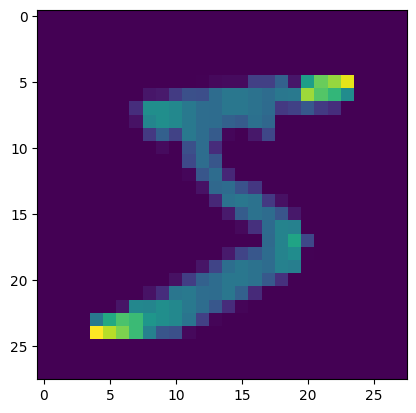

In [4]:
plt.imshow(x_train[0])
#plt.show()
print(x_train[0])

In [5]:
#resize img to train our cnn

x_trainr=np.array(x_train).reshape(-1,28,28,1)
x_testr=np.array(x_test).reshape(-1,28,28,1)

In [6]:
# creating cnn

model=Sequential()
model.add(Conv2D(50,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Conv2D(50,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(3,3))

model.add(Flatten())
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [10]:
history = model.fit(x_trainr,y_train,epochs=5,validation_split=.3)

Epoch 1/5
1313/1313 [==============================] - 29s 21ms/step - loss: 0.1358 - accuracy: 0.9572 - val_loss: 0.1052 - val_accuracy: 0.9661
Epoch 2/5
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0828 - accuracy: 0.9744 - val_loss: 0.0679 - val_accuracy: 0.9783
Epoch 3/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0633 - accuracy: 0.9801 - val_loss: 0.0642 - val_accuracy: 0.9799
Epoch 4/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0513 - accuracy: 0.9837 - val_loss: 0.0549 - val_accuracy: 0.9826
Epoch 5/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0515 - val_accuracy: 0.9848


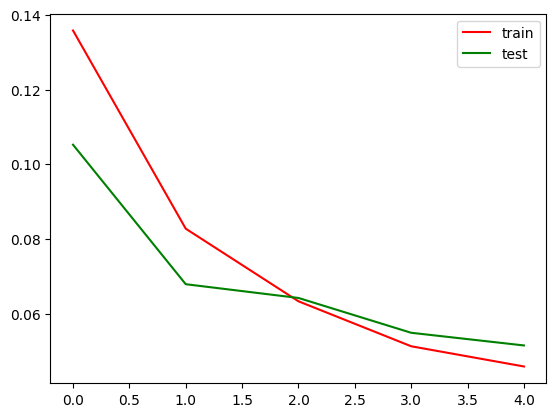

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='green', label='test')
plt.legend()
plt.show()

In [ ]:
import cv2

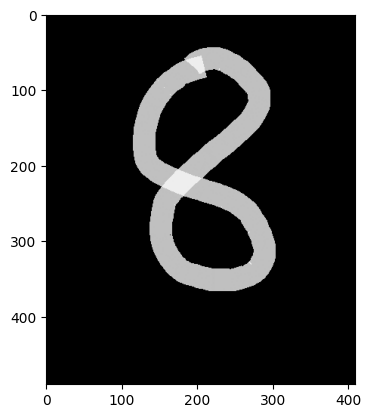

In [ ]:
img=cv2.imread('eight.png')
plt.imshow(img)
plt.show()

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
new=tf.keras.utils.normalize(resized,axis=1)

In [ ]:
new=np.array(new).reshape(-1,28,28,1)


In [ ]:
predict=model.predict(new)

1/1 [==============================] - 0s 166ms/step


In [ ]:
print(np.argmax(predict))

8
